DEVOIR MAISON 2

---
# Splines cubiques
---

In [193]:
import numpy as np
import matplotlib.pyplot as plt

**IMPORTANT** 
> 1. Dans ce DM on demande d'essayer d'éviter l'utilisation de boucles `for` dans *les définitions de fonctions*. Une solution utilisant des commandes vectorielles (commandes de `numpy`) apportera plus de points qu'une solution utilisant des boucles `for`.
> 2. Tout graphique doit avoir un titre et une légende.

L'un des problèmes d'approximation d'une fonction par son polynome interpolateur de Lagrange est le phénomène de Runge: le fait que le polynome interpolateur ne tend pas forcément vers la fonction interpolée quand le nombre de points d'interpolation augmente. L'une des solutions possibles à ce problème est la segmentation: on approche la fonction par des fonctions polynomiales *par morceaux*. Dans ce cas, pour améliorer l'approximation on augmente le nombre de morceaux et non le dégré des polynomes. Ceci est l'idée des *splines*.

## Définition
On considère sur un segment $ [ a, b ] $ une division $ a = x_0 < x_1 < \ldots < x_N = b $ définie par $ N + 1 $ points $ x_0, x_1, x_2, \ldots, x_N $. Une fonction $ s : [ a, b ] \to \mathbb{R} $ est appelée *spline* cubique relative aux noeuds $ x_i $ si 
- $ s $ est une fonction $ C^2 $ sur $ [a, b ] $: $ s \in C^2( [ a, b ] ) $ et
- sur chaque intervalle $ [ x_{ i }, x_{i+1} ] $ la fonction $ s $ est un polynome de degré $ 3 $: $ s_i \in \mathbb{R}_3[ X ] $, où $ s_i = \left. s \right|_{ [ x_{ i }, x_{i+1} ] } $, $ i = 0, 1, \ldots, N-1 $.

On dit qu'une spline $ s $ est une spline d'interpolation aux points $ ( x_i, y_i ) $, $ i = 0, 1, \ldots, N $, si en plus
- $ s( x_i ) = y_i $, $ i = 0, 1, \ldots, N $.  

## Construction

Dans ce qui suit nous allons utiliser la notation suivante: on dénote $ h_i = x_{ i + 1 } - x_i $, $ i = 0, 1, \ldots, N-1 $, et on appelle différences divisées $ \delta y $ les expressions définies par
\begin{equation*}
\delta y[ x_{ i + 1 }, x_i ] = \frac{ y_{ i + 1 } - y_i }{ x_{ i+1 } - x_i }, \quad i = 0, 1, \ldots, N-1.
\end{equation*}

Pour chaque intervalle $ [ x_{ i }, x_{i+1} ] $, $ i = 0, 1, \ldots, N-1 $, nous allons construire le polynome $ s_i $ ( la restriction de $ s $ sur $ [ x_{ i }, x_{i+1} ] $) comme le polynome de degré 3 vérifiant les conditions
\begin{equation*}
\begin{aligned}
& s_i( x_{ i } ) = y_{ i }, & s_i( x_{i+1} ) = y_{i+1}, \\
& s'_i( x_{ i } ) = p_{ i }, & s'_i( x_{i+1} ) = p_{i+1}, \\
\end{aligned}
\tag{1}
\end{equation*}
avec $ p_0, p_1, \ldots, p_N $ (les pentes) données. On peut montrer que pour tous $ y_{i}, y_{i+1}, p_{i}, p_{i+1} $ il existe unique polynome $ s_i $ de degré 3 vérifiant les 4 conditions (1). Comment choisir les pentes $ p_0, p_1, \ldots, p_N $? On va choisir les valeurs $ p_1, \ldots, p_{N-1} $ de telle sorte que la fonction $ s $ soit $ C^2 $ sur $ [ a, b ] $. Plus particulièrement, il est possible de montrer que pour que $ s_{i-1}''( x_{i} ) = s_{i}''( x_i ) $, $ i = 1, 2, \ldots, N-1 $, il faut que $ p_1, p_2, \ldots, p_{N-1} $ vérifient le système linéaire suivant:

\begin{equation*}
\begin{pmatrix}
2\left( \frac{1}{h_0} + \frac{1}{h_1} \right) & \frac{1}{h_1} &  & \ldots &   \\
\frac{1}{h_1} & 2\left( \frac{1}{h_1} + \frac{1}{h_2} \right) & \frac{1}{h_2} & &  \\
 & \frac{1}{h_2} & 2\left( \frac{1}{h_2} + \frac{1}{h_3} \right) & & \\
 & & \ldots & & \frac{1}{h_{ N - 2 }} \\
 & & & \frac{1}{h_{ N - 2 }} & 2\left( \frac{1}{h_{N-2}} + \frac{1}{h_{N-1}} \right)
\end{pmatrix}
\begin{pmatrix}
p_1 \\
p_2 \\
p_3 \\
\ldots \\
p_{ N - 1 }
\end{pmatrix} = 
\begin{pmatrix}
\hat c_1 \\
c_2 \\
c_3 \\
\ldots \\
\hat c_{ N - 1 }
\end{pmatrix}
\tag{2}
\end{equation*}
avec $ c_i $ donné par la formule 
\begin{equation}
\begin{aligned}
& c_i = 3 \left( \frac{ \delta y [ x_i, x_{ i -1 } ] }{ h_{ i - 1 } } + \frac{ \delta y[ x_{ i + 1 }, x_i ] }{ h_i } \right), \quad i = 1, 2, \ldots, N - 1, \text{ et } \\
& \hat c_1 = c_1 - \frac{ p_0 }{h_0 }, \quad \hat c_{ N-1 } = c_{ N-1 } - \frac{ p_N }{ h_{N-1} }.
\end{aligned}
\end{equation}

Dans ce DM nous allons étudier les splines dites *scellées*, i.e. nous allons préscire les valeurs de la dérivée de la spline au bord de l'intervalle $ [ a,b ] $.
En d'autres termes nous allons préscrire les valeurs $ p_0 $, $ p_N $. Notamment si on cherche une spline interpolant une fonction $ f $ aux points $ x_0, x_1, \ldots, x_N $, i.e. telle que $ s( x_i ) = f( x_i ) $ pour tout $ i $, alors nous allons imposer les conditions aux bords suivantes
$$
s'_0( a ) = f'( a ), \quad s'_{N-1}(b) = f'( b ).
$$
Ces conditions nous donnent donc les valeurs des pentes $ p_0 $ et $ p_N $: $ p_0 = f'( a ) $, $ p_N = f'( b ) $. Etant donné les valeurs de $ p_0 $ et $ p_N $ on peur résoudre le système (2) pour trouver les valeurs $ p_1, p_2, \ldots, p_{N-1} $.

**Question 1.** Proposer une fonction `M` qui prend en argument un tableau `x` contenant les valeurs $ x_0, x_1, \ldots, x_{N} $ et qui retourne la matrice du système (2). On essayera d'eviter l'utilisation de boucle. Pour construire une matrice tridiagonale on pourra utiliser la commande `diag` du module `numpy`. Testez votre fonction sur un vecteur `x` contenant peu de points.

In [194]:
def M(x):
    """
    Retourne la matrice du système (2)
    
    Parameters
    ----------
    
    x: ndarray
        vecteurs contenant les valeurs [x0, x1, ..., xN]
        
    Returns
    -------
    
    out: ndarray
        matrice du système (2)
    """
    h = x[1:] - x[:-1] # x[i+1] - x[i]
    return np.diag(2*(1/h[:-1] + 1/h[1:])) + np.diag(1/h[1:-1], k=-1) + np.diag(1/h[1:-1], k=1)
    
# Test
print(M(np.array([0, 1, 2, 3, 4])))

[[4. 1. 0.]
 [1. 4. 1.]
 [0. 1. 4.]]


**Question 2.** Proposer une fonction `sprime` qui prend en argument deux tableaux `x` et `y` de meme taille $ N + 1 $ et deux réels `p0` et `pN` et qui retourne un vecteur de taille $ N - 1 $ des valeurs $ p_1, p_2, \ldots, p_{N-1} $ solution du système (2). On essayera d'eviter l'utilisation de boucle. Pour résoudre un système linéaire on pourra se servir de la commande `solve` du module `numpy.linalg`.

In [195]:
def sprime(x, y, p0, pN):
    """
    Retourne la solution du système (2)
    
    Parameters
    ----------
    
    x: ndarray
        vecteurs contenant les valeurs [x0, x1, ..., xN]
    y: ndarray
        vecteurs contenant les valeurs [y0, y1, ..., yN]
    p0: int
        première valeur du vecteur p
    pN: int
        N-ième valeur du vecteur p
        
    Returns
    -------
    
    out: ndarray
        solution du système (2)
    """
    h = x[1:] - x[:-1]
    delta_y = (y[1:] - y[:-1]) / h
    c = 3 * (delta_y[1:]/h[1:] + delta_y[:-1]/h[:-1])
    c[0] -= p0/h[0]
    c[-1] -= pN/h[-1]
    return np.linalg.solve(M(x), c)

Nous nous proposons de construire une interpolation par spline cubique de la fonction $f$ suivante:
$$
f( x ) = \frac{ 1 }{ 1 + x^2 }. 
$$
On va considérer cette fonction sur l'intervalle $ [ -5, 5 ] $.

**Question 3.** 
> 1. Définir la fonction `f` et sa dérivée `fprime`
> 2. Tracer dans une fenetre graphique le graphe de la dérivée de $ f $ sur $ [-5,5] $. Pour tester la fonction `sprime` definir un vecteur `x` de $ N+1 $ points équirepartis entre $ a = -5 $ et $ b =5 $ (on peut prendre $ N = 20 $, par exemple) et construire le vecteur de pentes `p`. Tracer les pentes `p` en fonction de `x` à l'aide de la commande `ax.scatter` *dans la meme fenetre graphique*. Vérifier que les valeurs $p_0, p_1, \ldots, p_N$ fournissent une bonne approximation de la dérivée de $ f $. On peut essayer d'obtenir une figure qui ressemble à celle-ci:
<div>
<img src="sprime.png" width="500"/>
</div>

Text(0.5, 1.0, 'Les pentes de la spline cubique')

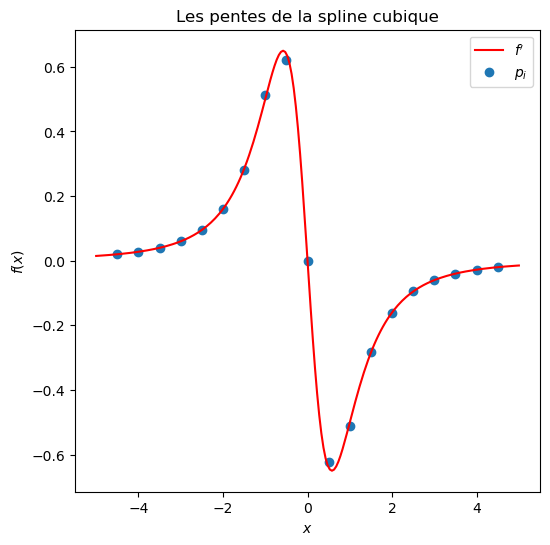

In [196]:
def f(x):
    """
    Retourne la fonction f évaluée aux points x
    
    Parameters
    ----------
    
    x: ndarray
        vecteurs contenant les valeurs [x0, x1, ..., xN]
        
    Returns
    -------
    
    out: ndarray
        Valeur de la fonction f aux points x
    """
    return 1 / (1 + x**2)

def fprime(x):
    """
    Retourne la fonction dérivée de f évaluée aux points x
    
    Parameters
    ----------
    
    x: ndarray
        vecteurs contenant les valeurs [x0, x1, ..., xN]
        
    Returns
    -------
    
    out: ndarray
        Valeur de la fonction dérivée de f aux points x
    """
    return -2*x/((1+x**2)**2)

# Paramètres 
xx = np.linspace(-5, 5, 200)
x = np.linspace(-5, 5, 21)
pi = sprime(x, f(x), fprime(-5), fprime(5))

# Graphique
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(xx, fprime(xx), label=f'$f\'$', color='red')
ax.scatter(x[1:-1], pi, label=f'$p_i$')
ax.legend()
ax.set_xlabel(f'$x$')
ax.set_ylabel(f'$f(x)$')
ax.set_title('Les pentes de la spline cubique')

#### Après avoir determiné les pentes $ p_0, p_1, \ldots, p_N $ nous allons trouver les expressions explicites pour les polynomes cubiques $ s_i $. Nous supposons que les polynomes cubiques $ s_i $ sont donnés par la formule

$$
s_i( x ) = a_i + b_i ( x - x_i ) + c_i ( x - x_i )^2 + d_i( x - x_i )^3, \quad i = 0, 1, \ldots, N-1.
\tag{3}
$$

**Question 4.** Montrer que si $ s_i $ vérifie (1), alors les coéficients $ a_i, b_i, c_i, d_i $ sont donnés par les formules suivantes pour $ i = 0, 1, \ldots, N-1 $ :

$$
\begin{aligned}
& a_i = y_i, \\
& b_i = p_i, \\
& c_i = \frac{ 3 }{ h_i } \delta y[ x_{ i + 1 }, x_i ] - \frac{ p_{ i + 1 } + 2 p_i }{ h_i } \\
& d_i = \frac{ 1 }{ h_{i}^2 }( p_{i+1} + p_{ i } ) - \frac{ 2 }{ h_{i}^2 } \delta y[ x_{i+1}, x_{i} ].
\end{aligned}
$$

**Question 5.** Programmer une fonction `splines` qui prend en argument un `ndarray` `x` et un `ndarray` `y` de meme taille $ N + 1 $ et deux réels `p0` et `pN` et qui retourne un tableau `S` de taille $ ( N, 4 ) $ tel que la $i$-ème ligne de $ S $ contient les valeurs $ a_i, b_i, c_i, d_i $. (On essayera d'éviter l'utilisation de boucle.)

In [197]:
def splines(x, y, p0, pN):
    """
    Retourne la matrice S de taille (4, N)
    
    Parameters
    ----------
    
    x: ndarray
        vecteurs contenant les valeurs [x0, x1, ..., xN]
    y: ndarray
        vecteurs contenant les valeurs [x0, x1, ..., xN]
    p0: int
        première valeur du vecteur p
    pN: int
        N-ième valeur du vecteur p
        
    Returns
    -------
    
    out: ndarray
        Matrice S de taille (4, N) tel que la i-ième ligne contient les valeurs a_i, b_i, c_i et d_i
    """
    h = x[1:] - x[:-1]
    delta_y = (y[1:] - y[:-1]) / h
    
    a = y
    b = np.concatenate((np.array([p0]), sprime(x, y, p0, pN), np.array([pN])))
    c = 3/h * delta_y - (b[1:] + 2*b[:-1]) / h
    d = 1/h**2 * (b[1:] + b[:-1]) - 2/h**2 * delta_y
    return np.transpose([a[:-1], b[:-1], c, d])

**Question 6.** Dans cette question nous allons tester la fonction `splines`
> 1. Créer un vecteur `x` de $ N + 1 $ points equirepartis entre $a = -5 $ et $ b = 5 $ et un vecteur `y` de $ N + 1 $ points aléatoires entre $ 0 $ et $ 1 $ (on pourra prendre $ N = 5 $, par exemple). 
> 2. Construire la spline cubique scellée $ s $ d'interpolation aux points $ (x_i, y_i) $, $ i = 0, 1, \ldots, N$ à l'aide de la fonction `splines`. On pourra prendre $ p_0 = p_N = 0 $ comme valeurs de pente aux bords.
> 3. Tracer le graphe de $ s $ sur $ [ a, b ] $. Ajouter le nuage de points $ (x_i, y_i) $, $ i = 0, 1, \ldots, N $. Vérifier que le graphe de $ s $ passe par les points $ ( x_i, y_i ) $.

Pour tracer le graphe de la spline construite à l'aide de la fonction `splines` pour des points *équirepartis* `x` on pourra utiliser la fonction `spline_eval` définie ci-dessous. Elle prend en argument un vecteur `x` des noeuds de la spline (de taille $N+1$) *équirepartis*, un vecteur `xx` des points où on veut evaluer les valeurs de la spline et un tableau `S` de taille $ (N, 4) $ tel que la $i$-ème ligne de $ S $ contient les coefficients $ a_i, b_i, c_i, d_i $ de la resctriction de la spline à l'intervalle $ [ x[ i ], x[ i + 1 ] ] $ comme définis dans la formule (3). Elle retourne le tableau des valeurs de la spline aux points de `xx`.

In [198]:
def spline_eval( x, xx, S ):
    """
    Evalue une spline définie par des noeuds équirepartis
    
    Parameters
    ----------
    
    x: ndarray
        noeuds définissant la spline
        
    xx: ndarray
        abscisses des points d'évaluation
    
    S: ndarray
        de taille (x.size-1, 4)
        tableau dont la i-ème ligne contient les coéficients du polynome cubique qui est la restriction
        de la spline à l'intervalle [x_i, x_{i+1}]
        
    Returns
    -------
    
    ndarray
        ordonnées des points d'évaluation
    """
    ind = ( np.floor( ( xx - x[ 0 ] ) / ( x[ 1 ] - x[ 0 ] ) ) ).astype( int )
    ind = np.where( ind == x.size-1, ind - 1 , ind )
    yy = S[ ind, 0 ] + S[ ind, 1 ] * ( xx - x[ ind ] ) + \
        S[ ind, 2 ] * ( xx - x[ ind ] )**2 + S[ ind, 3 ] * ( xx - x[ ind ] )**3
    return yy

Text(0.5, 1.0, 'Evaluation de la spline cubique')

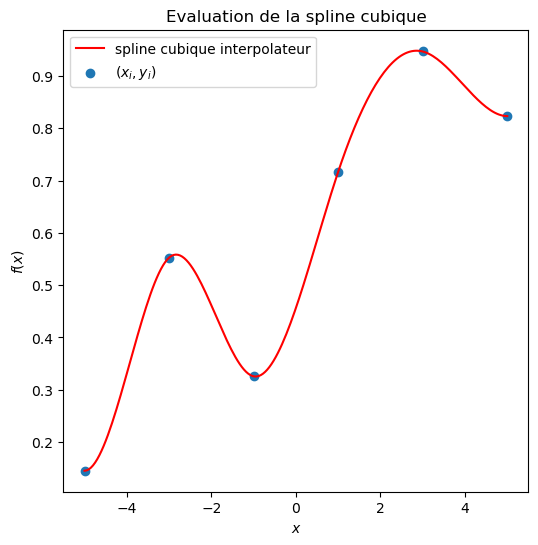

In [210]:
# Paramètres 
x = np.linspace(-5, 5, 6)
y = np.random.rand(5+1)
xx = np.linspace(-5, 5, 200)
s = splines(x, y, 0, 0)
s_eval = spline_eval(x, xx, s)

# Graphique
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(xx, s_eval, label='spline cubique interpolateur', color='red')
ax.scatter(x, y, label=f'$(x_i, y_i)$')
ax.legend()
ax.set_xlabel(f'$x$')
ax.set_ylabel(f'$f(x)$')
ax.set_title('Evaluation de la spline cubique')

**Question 7.** Pour chacune des valeurs de $ N = 4, 9, 19 $ créer un vecteur `x` de $ N + 1 $ points équirepartis entre $ a $ et $ b $. Tracer dans la meme fenetre graphique la fonction $ f $ et ses splines cubiques interpolateurs aux noeuds définis par le vecteur `x` pour des différentes valeurs de $ N $. Commenter les résultats obtenus. Comparer avec les résultats de la Question 3 du TP05.

Text(0.5, 1.0, 'Evaluation de la spline cubique')

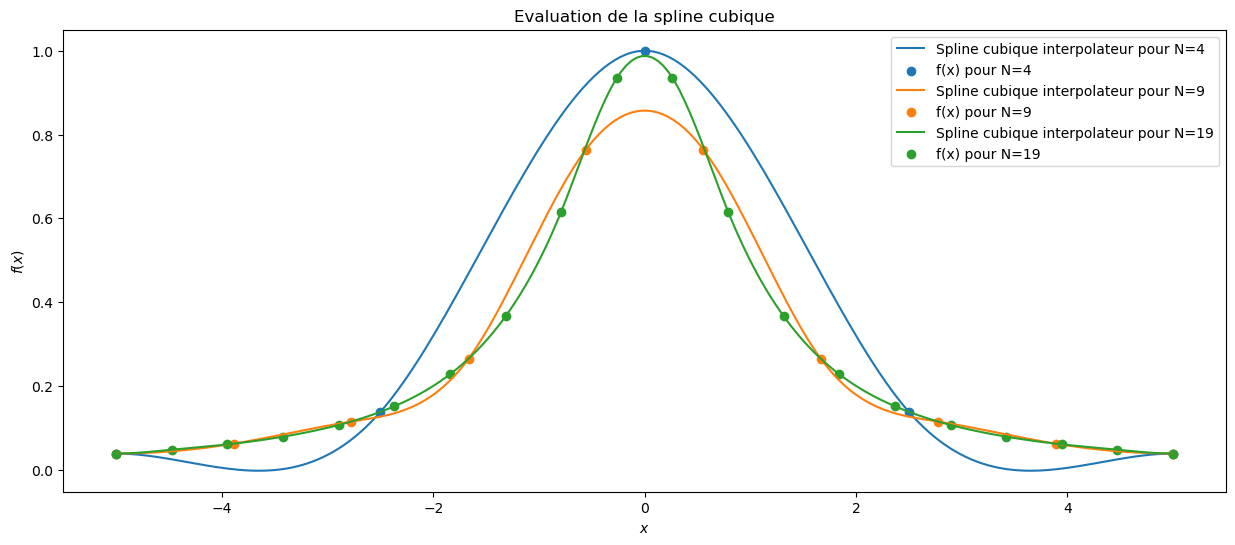

In [205]:
# Paramètres 
a, b = -5, 5
N_list = [4, 9, 19]

# Graphique
fig, ax = plt.subplots(figsize=(15, 6))

for N in N_list:
    x = np.linspace(a, b, N+1)
    xx = np.linspace(a, b, 200)
    s = splines(x, f(x), 0, 0)
    s_eval = spline_eval(x, xx, s)
    ax.plot(xx, s_eval, label=f'Spline cubique interpolateur pour N={N}')
    ax.scatter(x, f(x), label=f'f(x) pour N={N}')
    
ax.legend()
ax.set_xlabel(f'$x$')
ax.set_ylabel(f'$f(x)$')
ax.set_title('Evaluation de la spline cubique')